In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

The first step is to load the dataset and have a general overview of the dataset

In [3]:
# Loading the dataset 
weather_df = pd.read_csv("../Datasets/1. Weather Data.csv")
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### 1. Data Overview and Cleaning 
___ 
At this stage, we shall;
- Look at the key characteristics of the dataset (E.g., No. of records, features, and datatypes).
- Identify and handle any missing and null values.
- Check for and any duplicate records.

In [4]:
# Getting the No. of records in the dataset 
len(weather_df)

8784

In [5]:
# Looking at the features in the dataset 
weather_df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [6]:
# Looking at the different datatypes in the dataset 
weather_df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [7]:
# Looking at the shape of the dataset
weather_df.shape 

(8784, 8)

The dataset has;

- 8,784 Rows 

- 8 Columns

In [8]:
# Identifying missing of NULL values in the dataset 
weather_df.isnull().any()

Date/Time           False
Temp_C              False
Dew Point Temp_C    False
Rel Hum_%           False
Wind Speed_km/h     False
Visibility_km       False
Press_kPa           False
Weather             False
dtype: bool

- The dataset does not have any missing or null values

In [9]:
# Checking for duplicate ROWS

num_duplicates = weather_df.duplicated().sum()

print("Number of duplicate ROWS: {}".format(num_duplicates))


Number of duplicate ROWS: 0


- There are no duplicates in the dataset

### 2. Statistical Summary
___ 
- Provide statistical summary of dataset (mean, median, std) for numeric features 
- Identify and describe any significant outliers in the dataset

In [10]:
# Summary Statistics 

weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


<Axes: >

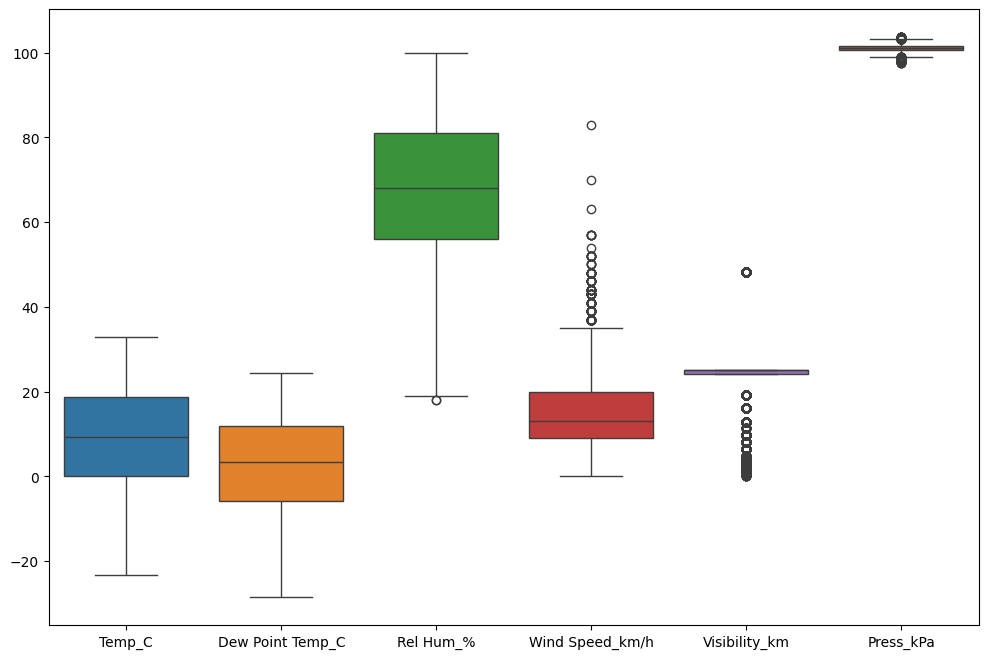

In [11]:
# Discovering outliers in the dataset using Boxplots 
plt.figure(figsize=(12,8))

sns.boxplot(data=weather_df)

- From the Boxplots, we can see that only two columns (Wind Speed_km/h, Visibility) tend to have outliers.

- We shall address these outliers as follows

A. Using IQR to identify and address the outliers "Wind Speed_km/h" column

In [12]:
# Using IQR to identify and address the outliers "Wind Speed_km/h" column

Q1 = weather_df["Wind Speed_km/h"].quantile(0.25) # Lower quartile 
Q3 = weather_df["Wind Speed_km/h"].quantile(0.75) # Upper quartile 

# Inter Quartile Range
IQR = Q3 - Q1

# finding the lower and upper bounds for outliers 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5

# Removing the outliers 
cleaned_weather_df = weather_df[(weather_df["Wind Speed_km/h"] >= lower_bound) & (weather_df["Wind Speed_km/h"] <= upper_bound)]

B. Using IQR to identify and address the outliers "Visibility_km" column

In [13]:
Q1 = cleaned_weather_df.Visibility_km.quantile(0.25) # Lower Quartile 
Q3 = cleaned_weather_df.Visibility_km.quantile(0.75) # Upper Quartile 

# Getting IQR 
IQR = Q3 - Q1 

# Upper and lower bounds 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5 

# Removing the outliers for this column 
cleaned_weather_df = cleaned_weather_df[(cleaned_weather_df.Visibility_km >= lower_bound) & (cleaned_weather_df.Visibility_km <= upper_bound)]

C. Removing outliers for the 'Rel Hum_%' column

In [14]:
Q1 = cleaned_weather_df["Rel Hum_%"].quantile(0.25) # Lower Quartile 
Q3 = cleaned_weather_df["Rel Hum_%"].quantile(0.75) # Upper Quartile 

# Getting IQR 
IQR = Q3 - Q1 

# Upper and lower bounds 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5 

# Removing the outliers for this column 
cleaned_weather_df = cleaned_weather_df[(cleaned_weather_df["Rel Hum_%"] >= lower_bound) & (cleaned_weather_df["Rel Hum_%"] <= upper_bound)]

D. Removing outliers for the 'Press_kPa' column

In [15]:
Q1 = cleaned_weather_df["Press_kPa"].quantile(0.25) # Lower Quartile 
Q3 = cleaned_weather_df["Press_kPa"].quantile(0.75) # Upper Quartile 

# Getting IQR 
IQR = Q3 - Q1 

# Upper and lower bounds 
lower_bound = Q1 - IQR * 1.5 
upper_bound = Q3 + IQR * 1.5 

# Removing the outliers for this column 
cleaned_weather_df = cleaned_weather_df[(cleaned_weather_df["Press_kPa"] >= lower_bound) & (cleaned_weather_df["Press_kPa"] <= upper_bound)]

<Axes: >

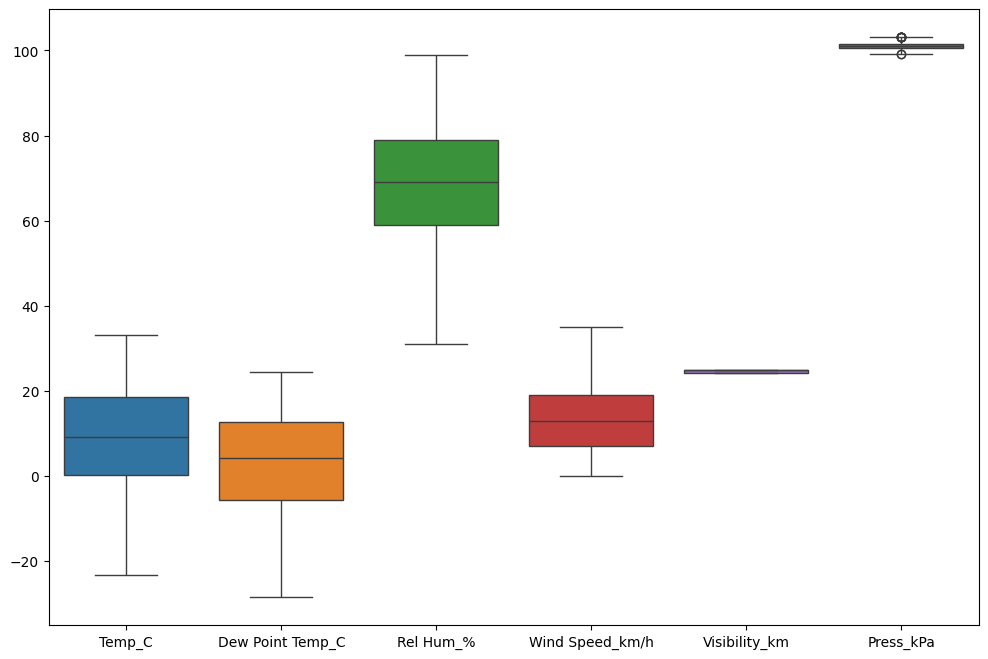

In [16]:
# Confirming that outliers were removed from the dataset 
plt.figure(figsize=(12,8))
sns.boxplot(data=cleaned_weather_df)

- All the outliers have been removed from the dataset

### 3. Data Visualization
___ 
- Visualization to show the distribution of key weather parameters 
- Time series graph showing trends over time 
- Correlation matrices and heatmaps to show relationships between different weather parameters

A. Distribution of key weather parameters, that is, Temperature, Humidity, and Wind Speed.

Text(0.5, 1.0, 'Distribution of Wind Speed')

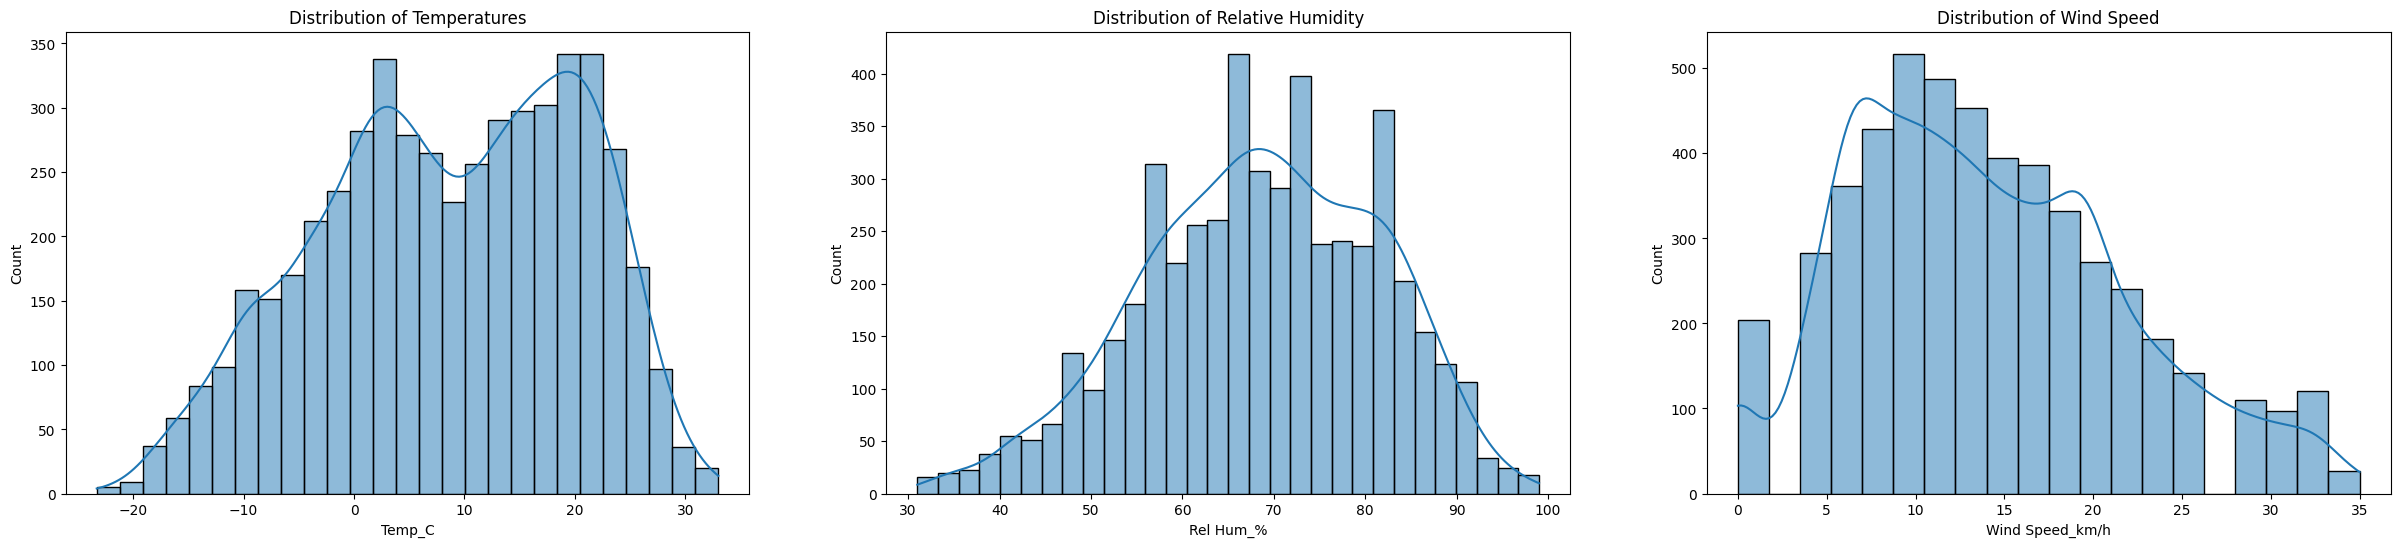

In [17]:
fig, ax = plt.subplots(1,3, figsize=(30, 6))

# Distribution of Temperatures 
sns.histplot(data=cleaned_weather_df, x="Temp_C", kde=True, ax=ax[0])
ax[0].set_title("Distribution of Temperatures")

# Distribution of Humidity 
sns.histplot(data=cleaned_weather_df, x="Rel Hum_%", kde=True, ax=ax[1])
ax[1].set_title("Distribution of Relative Humidity")

# Distribution of Wind Speed 
sns.histplot(data=cleaned_weather_df, x="Wind Speed_km/h", bins=20, kde=True, ax=ax[2])
ax[2].set_title("Distribution of Wind Speed") 


#### B. Time Series graph illustrating trends of weather parameters over time

In [18]:
cleaned_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5035 entries, 20 to 8766
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         5035 non-null   object 
 1   Temp_C            5035 non-null   float64
 2   Dew Point Temp_C  5035 non-null   float64
 3   Rel Hum_%         5035 non-null   int64  
 4   Wind Speed_km/h   5035 non-null   int64  
 5   Visibility_km     5035 non-null   float64
 6   Press_kPa         5035 non-null   float64
 7   Weather           5035 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 354.0+ KB


In [19]:
# Since the Date/Time column is not in datetime datatype,
# we shall transform it accordingly as below

cleaned_weather_df["Date/Time"] = pd.to_datetime(cleaned_weather_df["Date/Time"])

cleaned_weather_df.info() # To confirm transformation

<class 'pandas.core.frame.DataFrame'>
Index: 5035 entries, 20 to 8766
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         5035 non-null   datetime64[ns]
 1   Temp_C            5035 non-null   float64       
 2   Dew Point Temp_C  5035 non-null   float64       
 3   Rel Hum_%         5035 non-null   int64         
 4   Wind Speed_km/h   5035 non-null   int64         
 5   Visibility_km     5035 non-null   float64       
 6   Press_kPa         5035 non-null   float64       
 7   Weather           5035 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 354.0+ KB


In [20]:
# Creating a new column named "month" with actual names of each month
cleaned_weather_df["month"] = cleaned_weather_df["Date/Time"].dt.strftime("%b") 

# Confirming new col has been created
cleaned_weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month
20,2012-01-01 20:00:00,3.2,1.3,87,19,25.0,99.50,Cloudy,Jan
21,2012-01-01 21:00:00,4.0,1.7,85,20,25.0,99.39,Cloudy,Jan
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy,Jan
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers,Jan
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy,Jan


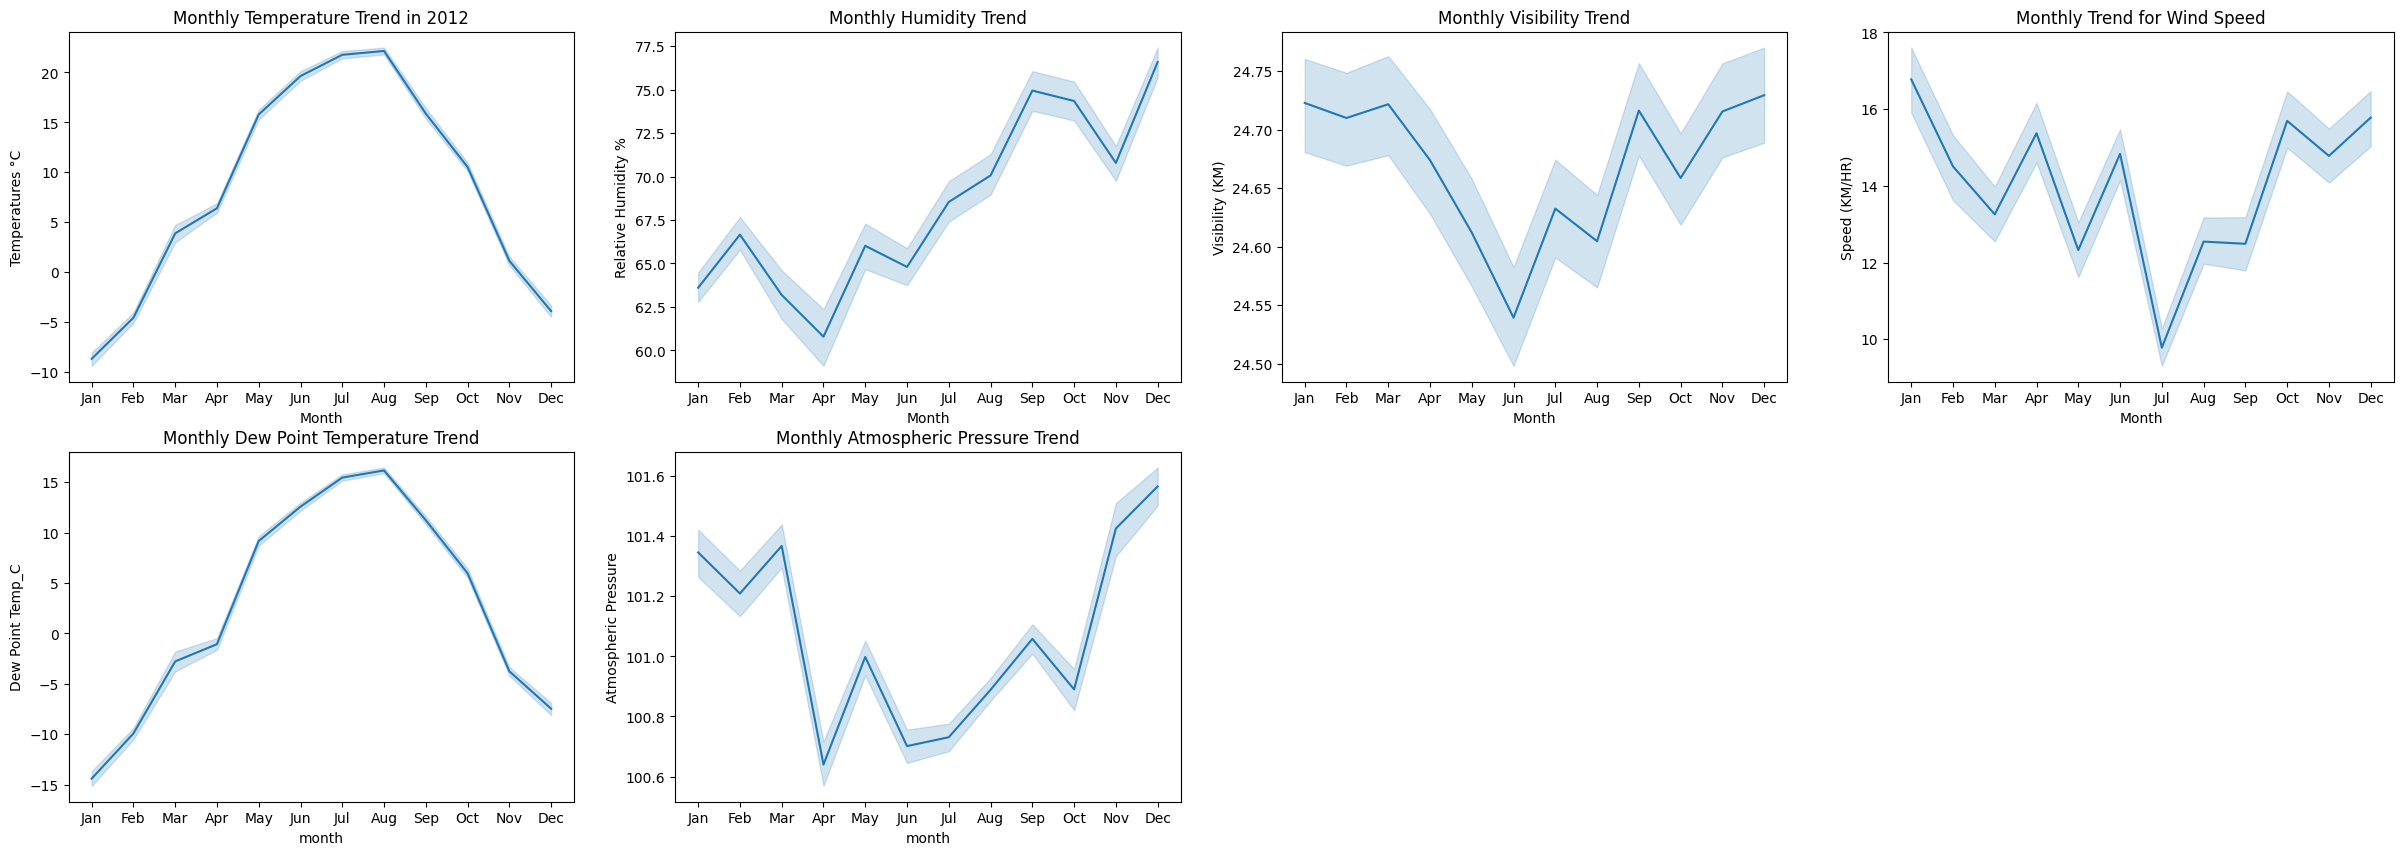

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(30, 10))

# Trendline for Temperature 
sns.lineplot(data=cleaned_weather_df, x="month", y="Temp_C", ax=ax[0, 0])
ax[0,0].set_title("Monthly Temperature Trend in 2012")
ax[0,0].set_xlabel("Month")
ax[0,0].set_ylabel("Temperatures °C")

# Trendline for Relative Humidity 
sns.lineplot(data=cleaned_weather_df, x="month", y="Rel Hum_%", ax=ax[0,1])
ax[0,1].set_xlabel("Month")
ax[0,1].set_ylabel("Relative Humidity %")
ax[0,1].set_title("Monthly Humidity Trend")

# Trend line for visibility condition 
sns.lineplot(data=cleaned_weather_df, x="month", y="Visibility_km", ax=ax[0,2])
ax[0,2].set_title("Monthly Visibility Trend")
ax[0,2].set_xlabel("Month")
ax[0,2].set_ylabel("Visibility (KM)")

# Trend line for Wind Speed 
sns.lineplot(data=cleaned_weather_df, x="month", y="Wind Speed_km/h", ax=ax[0,3])
ax[0,3].set_title("Monthly Trend for Wind Speed")
ax[0,3].set_xlabel("Month")
ax[0,3].set_ylabel("Speed (KM/HR)")

# Trendline for Dew point Temp
sns.lineplot(data=cleaned_weather_df, x="month", y="Dew Point Temp_C", ax=ax[1,0])
ax[1,0].set_title("Monthly Dew Point Temperature Trend") 

# Trend line for pressure_kPa 
sns.lineplot(data=cleaned_weather_df, x="month", y="Press_kPa", ax=ax[1,1])
ax[1,1].set_title("Monthly Atmospheric Pressure Trend")
ax[1,1].set_ylabel("Atmospheric Pressure")

# Deleting unused subplots 
plt.delaxes(ax[1, 2])
plt.delaxes(ax[1,3])

#### C. Correlation matrices and graphs showing relationship between different weather conditions

Text(0.5, 1.0, 'A Correlation Matrix of Different Weather Conditions')

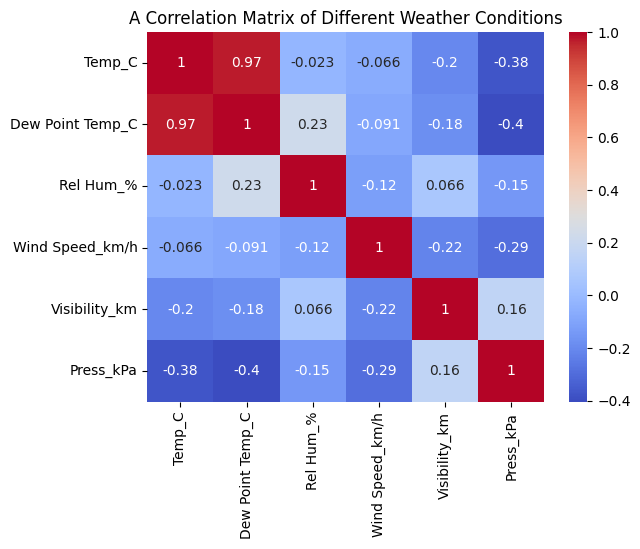

In [22]:
# We will first need to select numerical cols only 
# since correlation function can anly be applied on numerical data types 

# Selecting numerical cols only 
numerical_weather_df = cleaned_weather_df.select_dtypes(include=["float", "int"])

# getting correction matrix
corr_matrix = numerical_weather_df.corr()

# using heatmap to visualize the correlations matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("A Correlation Matrix of Different Weather Conditions")


### 4. Weather Patterns and Trends
___ 
- Describing trends and patterns observed in the data

The analysis of the data captures monthly weather trends and patterns for the year 2012. The key weather elements recorded in the dataset were;

- Temperature (C)
- Dew Point Temperature (C)
- Relative Humidity (%)
- Wind Speed (km/h)
- Visibility (km)
- Atmospheric Pressure (kPa) 

Through analysis, different seasonal patterns and trends were discoved as discussed below;

#### 1. *Temperature*

The Temperature lineplot above illustrates seasonal patterns with cooler temperatures at the begginning of the year (Jan - Apr) and towards the end of the year (Oct - Dec). 

Warmer temperatures are witnessed in the middle months (May - Sept) 

The trend line illustrate a progressive rise in temperatures from the first quarter depicting the onset of Spring followed by peak temperatures during summer. This is then followed with a decline in temperatures depicting the onset of Autum and Winter seasons towards the end of the year.

#### 2. *Visibility* 

Visibility was at peak at the beginning of the year (Jan - Feb) but dropped to a record low through to June before it started to rise through to Dec.

#### 3. *Atmospheric Pressure* 

Atmospheric Pressure was generally higher at the beginning of the year and towards the end of the year. 

There are however observable significant fluctuations during the year. In April, June, and Oct, for example, there was a significant drop in atmospheric pressure which could indicate an onset of storms.

#### 4. *Wind Speed* 

The Wind Speed lineplot illustrates a clear pattern of higher wind speed at the beging and the end of the year with middle months recording the lowest speeds. 

This phenomenon my be as a result of atmospheric pressure. Winter and Spring at the beginning and towards the end of the year cord cooler seasons and are often marked with higher pressures leading to higher speeds. 

Summer seasons are often characterized with calmer conditions hence low wind speeds.

#### 5. *Dew Point Temperature* 

Dew Point Temperatures refer to the temperature at which the air becomes saturated with with moisture and can no longer hold the water vapor leading to condensation or formation of dew.




### 4. Insights and Conclusions
___ 
- Key insights and observations from the EDA and how they can be used to predict weather conditions 

Based on the insights and patterns observed in the dataset, it can be easier to come up with conclusions that can be useful especially in predicting weather conditions 

Below are insights for different weather elements and how they can be used to predict weather conditions with suggested practical applications. 

##### a). *Temperatures* 
Temperature trends are seasonal with lower temperatures and then beginning and the end of the year. Warmer temperatures are witnessed mid-year. 

With this in mind, it would become easier to make accurate predictions of temperatures based on the time of the year. For example, people would know when to prepare with heating or cooling needs or when to anticipate heat waves and so on. 

##### b). *Visibility* 
Visibility element also exhibited seasonality trend with higher visibilities at the beginning and end of the year. Lower visibilities were experience mid-year. 

With this seasonality in mind, it would become easier for people to anticipate activities that are largely dependent on visibility such as aircraft, road safety, and maritime navigation. 

##### c). *Wind Speed* 
Seasonality trend was also witnessed with wind speed element. Higher speeds were witnessed at the beginning and towards the end of the year. 

Understanding the seasonality of wind speeds can help people plan better when to expect strong winds. This is especially on matters rrelating to safety and/or transportation.

### 4. Recommendations for Further Analysis
___ 
Below are some of the areas where further analysis may come in handy:

- The dataset can be extended to include weather data for different years. This would allow a comparative analysis of different weather elements year-on-year. 

- The weather dataset can also be extended to include different regions. This would allow the analysis to reveal patterns of how weather vary from one region or geographical area to another. It would become easier to discover local weather conditions and maybe identify regions with micro-climates. 

- Extending the analysis to include development of machine learning models for predicting weather conditions. Since difference weather elements have exhibited observable significant trends and patterns, developing models would come in handy allowing prediction of weather conditions. With machine learning models, weather conditions such as wind speed, temperatures, or visibility can be predicted to help in making informed decisions.